# Misure di Tendenza Centrale, Dispersione e Forma

La statistica descrittiva si occupa di descrivere, rappresentare e sintetizzare un campione di dati relativo ad una popolazione. Gli strumenti della statistica descrittiva possono essere sia numerici che grafici. I dati analizzati possono essere descritti secondo diversi aspetti. Esistono pertanto diversi "indicatori" oggettivi:
 * **numerosità** del campione;
 * **indicatori centrali**: media, mediana, moda;
 * **Indicatori di dispersione**: estremi, range, quantili, percentili, quartili, distanza inter-quartile, varianza;

Per esaminare questi strumenti, iniziamo considerando un semplice campione univariato:

In [3]:
import numpy as np
import pandas as pd
np.random.seed(42)
data_array = np.random.randint(0,5,size=10).astype(float)
data_array[2] = np.nan
data_array[8] = np.nan
data = pd.Series(data_array)
data

0    3.0
1    4.0
2    NaN
3    4.0
4    4.0
5    1.0
6    2.0
7    2.0
8    NaN
9    4.0
dtype: float64

Il campione contiene dei valori `NaN`. Si tratta di valori mancanti che per qualche motivo non sono stati rilevati e andranno gestiti opportunamente.

## Numerosità

La numerosità di un campione univariato $\{x^{(i)}\}_i^N$ è data dal numero di valori in esso contenuto: $|X|=|\{x^{(i)}\}_i^N| = N$. La numerosità di ciascuna colonna può anche essere diversa in quanto possono essistere dei valori mancanti, indicanti in genere con `NA` o `NaN`. Nel nostro caso:

In [4]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: None
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 208.0 bytes


## Indicatori Centrali: Media, Mediana e Moda

Gli indicatori centrali danno un'idea approssimata dell'ordine di grandezza dei valori del campione. 

### Media

La media di un campione è definita come la somma dei suoi valori diviso la sua numerosità: 

$$\overline X = \frac{1}{N}\sum_i^N x^{(i)}$$

La media del nostro campione sarà:

In [5]:
data.mean()

3.0

### Mediana

Quando gli elementi di un campione possono essere ordinati (ad esempio se sono valori numerici), la mediana di un campione (o l'elemento mediano) è l'elemento che divide in due parti uguali l'insieme ordinato dei valori del campione.  

L'elemento mediano si può ottenere ordinando i valori del campione e procedendo come segue:

* Se il numero di elementi è dispari, si prende il centrale. Ad esempio $[1,2,\mathbf{2},3,5] \to 2$.
* Se il numero di elementi è pari, si prende la media tra i due centrali. Ad esempio $[1,2,\mathbf{2},\mathbf{3},3,5] \to \frac{2+3}{2} = 2.5$.

Nel caso del nostro campione:

In [6]:
print(data.sort_values())
print("Valore mediano:",data.median())

5    1.0
6    2.0
7    2.0
0    3.0
1    4.0
3    4.0
4    4.0
9    4.0
2    NaN
8    NaN
dtype: float64
Valore mediano: 3.5


### Moda
La moda di un campione è l'elemento che si ripete più spesso. Ad esempio, consideriamo il seguente campione:

In [10]:
data=pd.Series([1,2,3,4,2,5,4,2,6,5,8,4,3,2,3])
data

0     1
1     2
2     3
3     4
4     2
5     5
6     4
7     2
8     6
9     5
10    8
11    4
12    3
13    2
14    3
dtype: int64

Consideriamo dunque le frequenze assolute:

In [11]:
data.value_counts()

2    4
3    3
4    3
5    2
1    1
6    1
8    1
dtype: int64

La moda sarà pari a $4$.

## Indicatori di dispersione (1): estremi, range, quartili

Gli indici di dispersione hanno il compito di quantificare in quale misura i valori di una distribuzione sono "dispersi", ovvero "lontani tra loro".

### Minimo, Massimo e Range
Semplici indici di dispersione sono il minimo ($min \{x^{(i)}\}_i^N$), il massimo ($max \{x^{(i)}\}_i^N$) e il range ($max \{x^{(i)}\}_i^N$ - $min \{x^{(i)}\}_i^N$). Tornando al ultimo esempio:

In [12]:
data

0     1
1     2
2     3
3     4
4     2
5     5
6     4
7     2
8     6
9     5
10    8
11    4
12    3
13    2
14    3
dtype: int64

Avremo che:

In [13]:
print("Minimo:", data.min())
print("Massimo:", data.max())
print("Range:", data.max() - data.min())

Minimo: 1
Massimo: 8
Range: 7


### Normalizzazioni del Range dei Dati
Il range dei dati dipende fortemente dalla natura dei dati e dalla loro unità di misura. Ad esempio, le età si misurano in anni, mentre i pesi in Kg o libbre. Pertanto, esistono delle tecniche di normalizzazione dei dati che permettono di rendere dati basati su unità di misura diverse comparabili tra di loro.

#### Normalizzazione tra 0 e 1
Questa normalizzazione scala i dati in modo che i valori minimo e massimo risultino esattamente pari a $0$ e $1$, usando la seguente formula:
\begin{equation}
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
\end{equation}

Nel caso del nostro campione, otterremmo:

In [15]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm

0     0.000000
1     0.142857
2     0.285714
3     0.428571
4     0.142857
5     0.571429
6     0.428571
7     0.142857
8     0.714286
9     0.571429
10    1.000000
11    0.428571
12    0.285714
13    0.142857
14    0.285714
dtype: float64

#### Normalizzazione tra -1 e 1
In questo caso, i dati vengono riscalati in modo che i nuovi minimo e massimo siano $-1$ e $1$, usando la seguente formula:
\begin{equation}
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
\end{equation}

Possiamo effettuare questa trasformazione in Pandas come segue:

In [16]:
data_norm2 = (data.max()+data.min()-2*data)/(data.max()-data.min())
data_norm2

0     1.000000
1     0.714286
2     0.428571
3     0.142857
4     0.714286
5    -0.142857
6     0.142857
7     0.714286
8    -0.428571
9    -0.142857
10   -1.000000
11    0.142857
12    0.428571
13    0.714286
14    0.428571
dtype: float64

### Quantili, Percentili e Quartili

Quantili, percentili e quartili generalizzano il concetto di mediana. 

#### Quantili
Un quantile di ordine $\alpha$ è un valore $q_\alpha$ che divide un campione in due parti di dimensioni proprozionali a $\alpha$ e $1-\alpha$. Valori più piccoli o uguali a $q_\alpha$ appartengono alla prima parte della suddivisione, mentre valori maggiori a $q_\alpha$ appartengono alla seconda parte. 

Ad esempio, dato il campione già ordinato `[1,2,3,3,4,5,6,6,7,8,8,9]`, un quantile $q_{0.25}$ dividerà il campione in due parti di dimensione proporzionale a $0.25$ e $1-0.25=0.75$. In questo caso $q_{0.25}=3$ e le due parti saranno `[1,2,3,3]` e `[4,5,6,6,7,8,8,9]`.

Anche in questo caso, come nel caso della mediana, si effettuano medie di valori adiacenti ove opportuno.

I quantili vanno interpretati così:

> Se un quantile di ordine $\alpha$ è pari al numero $x$, allora vuole dire che $\alpha \times n$ elementi hanno un valore inferiore o uguale a $x$, dove $n$ è il numero di elementi nel campione.

Va notato che:
* Il minimo è un quantile di ordine 0;
* Il massimo è un quantile di ordine 1;
* La mediana è un quantile di ordine 0.5.

Vediamo alcuni esempi sul nostro piccolo campione:

In [24]:
print("Quantile di ordine 0 (minimo):", data.quantile(0))
print("Quantile di ordine 0.5 (mediana):", data.quantile(0.5))
print("Quantile di ordine 1 (massimo):", data.quantile(1))
print("Quantile di ordine 0.15:", data.quantile(0.15))

Quantile di ordine 0 (minimo): 1.0
Quantile di ordine 0.5 (mediana): 3.0
Quantile di ordine 1 (massimo): 8.0
Quantile di ordine 0.15: 2.0


Dai dati sopra deduciamo che:
* Il $50\%$ dei valori sono inferiori o uguali a 3;
* Il $15\%$ dei valori sono minori o ugualei a 2.

#### Percentili
I percentili sono semplicemente quantili espressi in precentuale. Un quantile di ordine $0.25$ è un percentile di ordine $25\%$.

#### Quartili

I quartili sono degli specifici quantili che suddividono il campione in quattro parti. In particolare:

* Il quartile di ordine 0 è un quantile di ordine 0;
* Il quartile di ordine 1 è un quantile di ordine $1/4=0.25$;
* Il quartile di ordine 2 è un quantile di ordine $2/4=0.5$;
* Il quartile di ordine 3 è un quantile di ordine $3/4=0.75$;
* Il quartile di ordine 4 è un qauntile di ordine $4/4=1$.

Vediamo qualche esempio sul nostro piccolo campione:

In [25]:
print("Quartile di ordine 0 (minimo):", data.quantile(0/4))
print("Quartile di ordine 1:", data.quantile(1/4))
print("Quartile di ordine 2 (mediana):", data.quantile(2/4))
print("Quartile di ordine 3:", data.quantile(3/4))
print("Quartile di ordine 4 (massimo):", data.quantile(4/4))

Quartile di ordine 0 (minimo): 1.0
Quartile di ordine 1: 2.0
Quartile di ordine 2 (mediana): 3.0
Quartile di ordine 3: 4.5
Quartile di ordine 4 (massimo): 8.0


## Boxplot

I boxplot costituiscono un metodo di visualizzazione compatto per rappresentare alcune caratteristiche descrittive dei dati sotto analisi. In particolare, dato un campione, un boxplot riesce a rappresentarne efficacemente le seguenti quantità:
 * Valore mediano;
 * Primo e terzo quartile;
 * Minimo e massimo (a seconda della "versione" del boxplot, come discusso di seguito).

Per illustrare l'utilità dei boxplot, considereremo il dataset di pesi e altezze visto in precedenza:

In [26]:
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
del hw['BMI']
hw

,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390
...,...,...,...
4226,F,69,23.862436
4227,M,69,38.262182
4228,F,64,34.970812
4229,F,64,28.388071


I quartili sul campione dei pesi saranno i seguenti:

In [41]:
desc = hw['weight'].describe()
desc.iloc[[3,4,5,6,7]]

min    20.571066
25%    29.828045
50%    34.970812
75%    41.142132
max    61.301776
Name: weight, dtype: float64

Il boxplot delle altezze si presenta come segue:

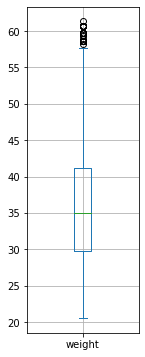

In [42]:
from matplotlib import pyplot as plt
hw['weight'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Il boxplot si mostra come una "scatola" con dei "baffi" in cui:
 * l'estremo inferiore della scatola indica il primo quartile;
 * l'estremo superiore della scatola indica il terzo quartile;
 * la linea orizzontale in mezzo alla scatola rappresenta il valore mediano del campione;
 * il baffo inferiore rappresenta il primo valore nel campione che risulta essere maggiore o uguale al primo quartile meno una volta e mezza la distanza tra i il terzo e il primo quartile;
 * il baffo superiore rappresenta il primo valore nel campione che risulta essere minore o uguale al terzo quartile più una volta e mezza la distanza tra i il terzo e il primo quartile;
 * i tondini rappresentano i valori "fuori limite" che ricadono fuori dall'intervallo contrassegnato dai baffi. Vengono in genere considerati come "outliers".

I boxplot possono essere utili a comparare campioni. Ad esempio, i seguenti boxplot comparano le distribuzioni di pesi e altezze:

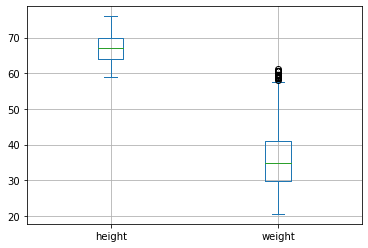

In [44]:
hw.plot.box()
plt.grid()
plt.show()

Dal grafico sopra possiamo notare che, mentre weight contiene degli outliers nella parte alta, height non li contiene. Questo non è particolarmente sorprendente, perché è più facile trovare un certo numero di persone sovrappeso che persone molto più alte della norma.

## Indicatori di dispersione (2), distanza inter-quartile e varianza

### Distanza interquartile

Il range non è un indice di dispersione molto robusto, in quanto non tiene conto della presenza di evenutali outliers. Si considerino ad esempio i seguenti campioni "artificiali":

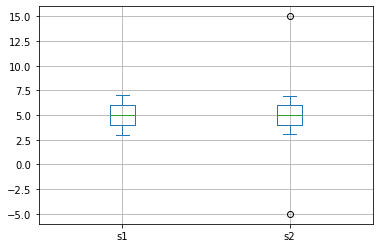

Range sample 1: 4.0
Range sample 2: 20.0


In [46]:
sample1 = np.linspace(3,7,100)
sample2 = sample1.copy()
sample2[0]=-5 #sostituiamo due valori con gli outliers -5
sample2[-1]=15 # e 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})

df.plot.box()
plt.grid()
plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

I campioni sono simili, ma la presenza di due outliers (-5 e 15) nel secondo campione rende i range molto diversi (4 e 20).

Confrontando i due boxplot mostrati sopra, notiamo che le posizioni del terzo e del primo quartile sono più "robuste" agli outliers. Una misura di dispersione un po' più espressiva è dunque lo **scarto interquartile** (o **distanza interquartile**), che si misura come la differenza tra il terzo e il primo quartile:

In [47]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("Lo scarto interquartile di sample 1 è:",q13-q11)
print("Lo scarto interquartile di sample 2 è:",q23-q21)

Lo scarto interquartile di sample 1 è: 2.0
Lo scarto interquartile di sample 2 è: 2.0


### Varianza e Deviazione Standard

La varianza (detto anche scarto quadratico medio) fornisce una stima di quanto i dati osservati si allontanano dalla media. La varianza calcola la media dei quadrati degli scarti dei valori rispetto alla media, penalizzando i grandi scostamenti dal valore medio (dovuti agli outliers) maggiormente più dei piccoli scostamenti:

$$s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n}$$

La varianza dei pesi nel nostro dataset di pesi-altezze è:

In [54]:
hw['weight'].var()

63.806668494405045

Gli indici di dispersione visti fino ad ora (esclusa la varianza) hanno come unità di misura la stessa dei dati di input. Nel caso dei pesi, i dati vengono misurati in libbre. E' pertanto corretto dire che **minimo**, **massimo**, **range**, **scarto interquartile** e **scarto medio assoluto** calcolati sui pesi si misurano in libbre.

Lo stesso discorso non vale per la varianza, che si misurera in **libbre al quadrato**. Se vogliamo ottenere una misura di dispersione **commensurabile**, possiamo calcolare la radice quadrata della varianza, ottenendo così la **deviazione standard** (o **scarto quadratico medio**), che si definisce come segue:

$$s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}{n}(x_i-x^2)}{n}}$$

Le medie e deviazioni standard delle due variabili pesi e altezze sono:

In [55]:
desc=hw[['height','weight']].describe()
desc.iloc[[1,2]]

,height,weight
mean,66.826046,35.818062
std,4.002658,7.987908


La deviazione standard ci dice qualcosa anche sulla "forma" della distribuzione. Confrontiamo ad esempio le deviazioni standard delle altezze di uomini e donne:

In [59]:
hw.groupby('sex')['height'].std()

sex
F    2.686187
M    2.911766
Name: height, dtype: float64

Dal confronto notiamo che le altezze degli uomini sono "più disperse" (hanno cioè una deviazione standard più alta). Confrontiamo le stime di densità dei due campioni:

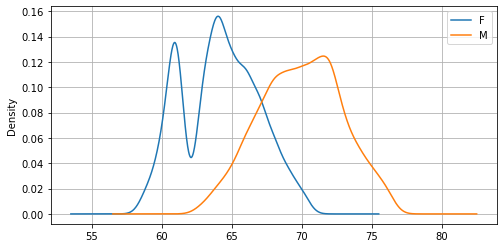

In [60]:
hw.groupby('sex')['height'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

Notiamo che in effetti la stima di densità per gli uomini ha individuato una curva più "spanciata", che si correla bene con la più alta devizione standard.

### Standardizzazione (z-scoring)

In molti casi è utile normalizzare i dati in modo che essi presentino media nulla e deviazione standard unitaria. Questo tipo di normalizzazione viene detta "z-scoring" e viene effettuata sottraendo ai dati la media e dividendo per la deviazione standard. 

$$
z_i = \frac{x_i-\mu_X}{\sigma_X}
$$

dove $\sigma_X$ è la deviazione standard della popolazione alla quale appartiene $X$. Si noti che gli zeta scores sono **adimensionali** (ovvero, non hanno unità di misura).

Per capire qual è l'effetto di questa normalizzazione, osserviamo i boxplot di pesi e altezze prima e dopo la normalizzazione:

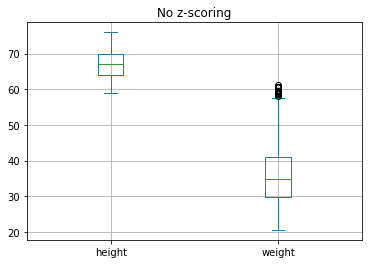

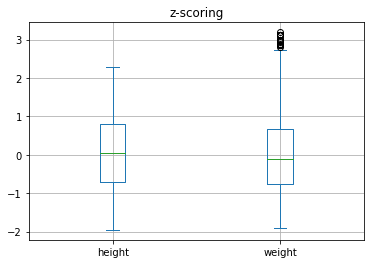

In [82]:
from scipy.stats import zscore

hw.plot.box()
plt.grid()
plt.title('No z-scoring')
plt.show()

hwz = hw.copy()
hwz['height'] = zscore(hwz['height'])
hwz['weight'] = zscore(hwz['weight'])
hwz.plot.box()
plt.grid()
plt.title('z-scoring')
plt.show()



Notiamo che l'asse delle y ha cambiato scala e che adesso i boxplot sono centrati intorno all'origine e hanno dimensioni comparabili. Confrontiamo anche le stime di densità:

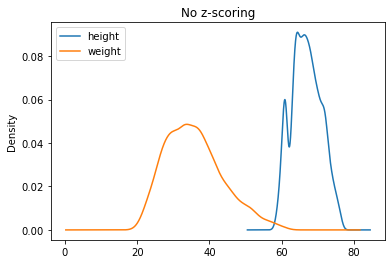

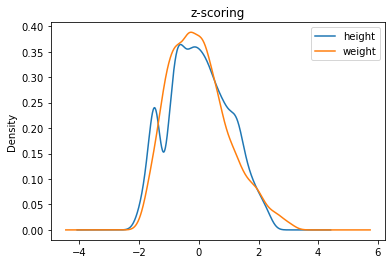

In [89]:
hw.plot.kde()
plt.title('No z-scoring')
plt.show()

hwz.plot.kde()
plt.title('z-scoring')
plt.show()

Una interpretazione comune degli z-scores è che essi misurano la deviazione dalla media in termini di deviazione standard della popolazione rispondendo alla domande "quante $\sigma$ ci sono tra il campione e la media"? 